In [1]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt

import os, sys
sys.path.append('../../')

sys.path.append('/Users/alexisdevitre/Documents/code/hts-irradiation')
import hts_anneal as anneal

import default_style

In [2]:
directory = 'data/'
fpaths = [directory+f for f in np.sort(os.listdir(directory)) if 'pressure' in f]
data = anneal.concatenateEnvironmentFiles(fpaths)

/Users/alexisdevitre/Documents/code/hts-irradiation/hts_anneal.py:15: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  return pd.read_csv(fpath, sep='\s+', parse_dates={'datetime' : [0, 1]}, date_format={'date':'%d/%m/%y', 'timestamp':'%H:%M:%S.%f'})
/Users/alexisdevitre/Documents/code/hts-irradiation/hts_anneal.py:15: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  return pd.read_csv(fpath, sep='\s+', parse_dates={'datetime' : [0, 1]}, date_format={'date':'%d/%m/%y', 'timestamp':'%H:%M:%S.%f'})
/Users/alexisdevitre/Documents/code/hts-irradiation/hts_anneal.py:15: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  return pd.read_csv(fpath, sep='

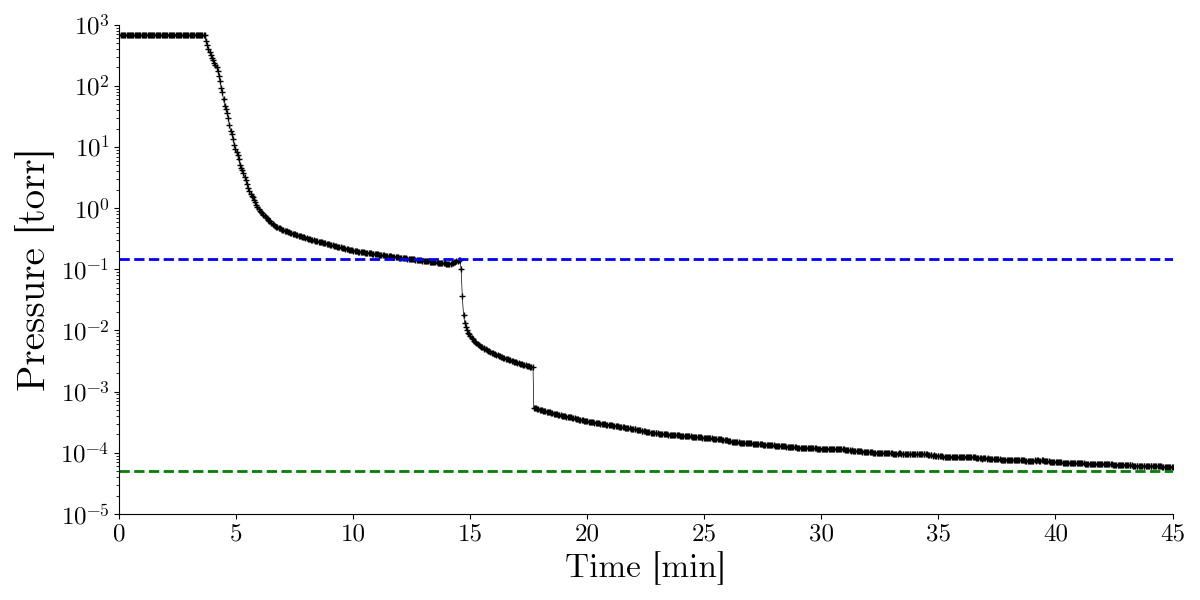

In [8]:
fig, ax = plt.subplots(figsize=(12, 6))
cdata = data[(data.pressure_torr < 1e9)&(1885546 < data.time_s)&(data.time_s < 1889000)]
ax.semilogy((cdata.time_s-1885546)/60, cdata.pressure_torr, marker='+', markersize=5, color='k', linestyle='-', linewidth=.5)

ax.axhline(150e-3, color='b', linestyle='--', linewidth=2)
ax.axhline(5e-5, color='green', linestyle='--', linewidth=2)
ax.set_xlim(0, 45)
ax.set_ylim(1e-5, 1e3)
ax.set_xlabel('Time [min]', fontsize=24)
ax.set_ylabel('Pressure [torr]', fontsize=28)
fig.tight_layout()
plt.savefig('pumping-curve.png')